<a href="https://colab.research.google.com/github/audalsgh/20250708/blob/main/0708_openCV_%EC%8B%A0%ED%98%B8%EB%93%B1%EA%B2%80%EC%B6%9C_%EA%B9%80%EC%98%81%EB%B9%88%EB%8B%98%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🚦 개선된 신호등 인식 프로그램
1️⃣ upload_and_detect() - 2개 신호등 모두 인식
2️⃣ compare_parameters() - 파라미터 비교

💡 추천: upload_and_detect() 를 실행하세요!
🚦 개선된 신호등 인식 시작!


Saving KakaoTalk_20250708_085906042.png to KakaoTalk_20250708_085906042.png

처리중: KakaoTalk_20250708_085906042.png
Step 0: 신호등 색상 필터링 시작...
Step 0: 색상 필터링 완료 (빨강/노랑/초록/파랑 영역만 추출)
Step 2: 노이즈 제거 완료
Step 3: 엣지 검출 완료 (30-180)
Step 4: 470개 윤곽선 발견
최종 결과: 10개 신호등 발견


/tmp/ipython-input-1-2328984627.py:206: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-2328984627.py:206: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-2328984627.py:206: UserWarning: Glyph 50659 (\N{HANGUL SYLLABLE ES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-2328984627.py:206: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-2328984627.py:206: UserWarning: Glyph 44160 (\N{HANGUL SYLLABLE GEOM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-2328984627.py:206: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1-2328984627.py:206: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu San

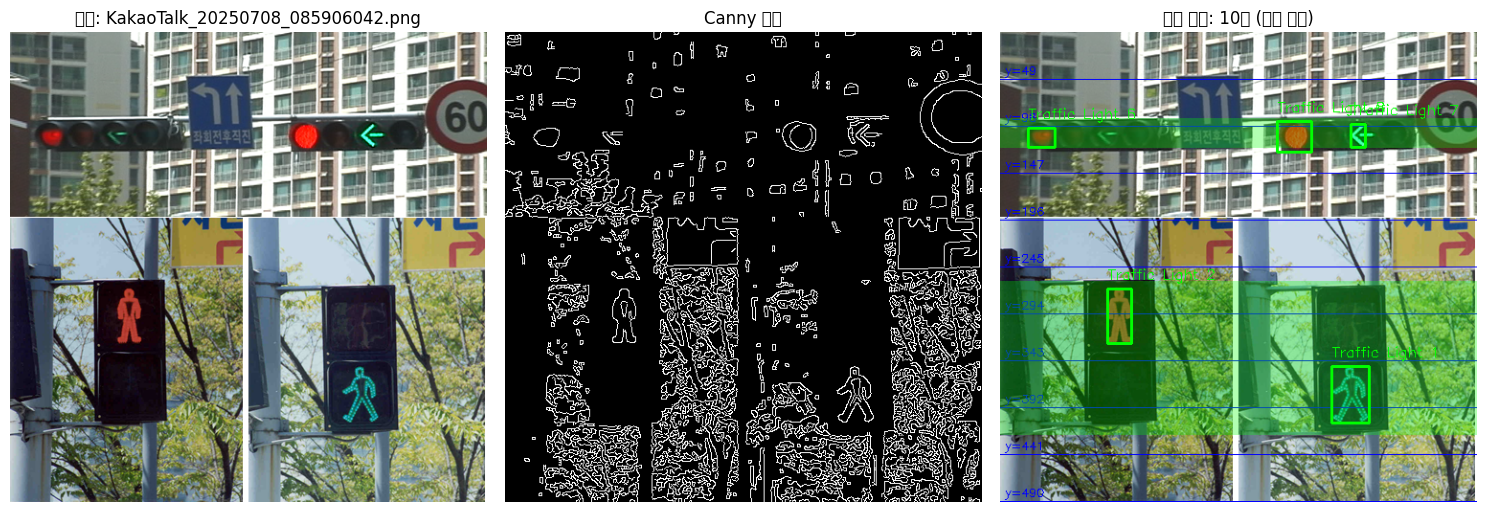

검출된 신호등 개수: 10개
  신호등 1: 위치=(346, 349), 크기=(39x59), 격자=78
  신호등 2: 위치=(112, 268), 크기=(25x57), 격자=63
  신호등 3: 위치=(410, 193), 크기=(86x55), 격자=50
  신호등 4: 위치=(154, 193), 크기=(90x65), 격자=44
  신호등 5: 위치=(45, 193), 크기=(51x20), 격자=42
  신호등 6: 위치=(29, 100), 크기=(28x20), 격자=21
  신호등 7: 위치=(366, 96), 크기=(15x24), 격자=28
  신호등 8: 위치=(289, 93), 크기=(36x32), 격자=27
  신호등 9: 위치=(354, 53), 크기=(15x13), 격자=18
  신호등 10: 위치=(53, 37), 크기=(25x15), 격자=2


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
import io

def detect_traffic_light_canny(image, min_area=100, max_area=8000, canny_low=50, canny_high=150, circularity_threshold=0.5, use_color_filter=True):
    """
    이 함수는 사진에서 신호등을 찾는 함수입니다 (색상 필터링 + Canny)
    입력: 컬러 사진, 최소면적, 최대면적, Canny 임계값들, 원형성 기준, 색상필터 사용여부
    출력: 신호등 위치들, 엣지 이미지
    """

    # 🔴 NEW Step: 색상 필터링 (신호등 색상만 찾기)
    if use_color_filter:
        print("Step 0: 신호등 색상 필터링 시작...")

        # HSV 색공간으로 변환 (색상 검출에 더 좋음)
        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

        # 빨강색 범위 (신호등 빨간불)
        red_lower1 = np.array([0, 50, 50])
        red_upper1 = np.array([15, 255, 255])
        red_lower2 = np.array([170, 50, 50])
        red_upper2 = np.array([180, 255, 255])
        red_lower3 = np.array([10, 70, 50])
        red_upper3 = np.array([20, 255, 255])

        # 노랑색 범위 (신호등 노란불)
        yellow_lower = np.array([20, 80, 80])   # Hue: 20부터 (노랑의 시작점), 채도/명도는 낮게
        yellow_upper = np.array([35, 255, 255]) # Hue: 35까지 (노랑~연노랑 경계)
        yellow_mask = cv2.inRange(hsv, yellow_lower, yellow_upper)
        # 초록색 범위 (신호등 초록불)
        green_lower = np.array([35, 50, 50])
        green_upper = np.array([90, 255, 255])
        green_mask1 = cv2.inRange(hsv, green_lower, green_upper)
        # 파란색/청록색 범위 (보행자 신호등 파란불) 🆕 추가!
        blue_lower = np.array([85, 50, 50])
        blue_upper = np.array([100, 255, 255])
        blue_mask = cv2.inRange(hsv, blue_lower, blue_upper)
        # 각 색상 마스크 생성
        red_mask1 = cv2.inRange(hsv, red_lower1, red_upper1)
        red_mask2 = cv2.inRange(hsv, red_lower2, red_upper2)
        red_mask3 = cv2.inRange(hsv, red_lower3, red_upper3)
        red_mask = cv2.bitwise_or(red_mask1, red_mask2)

        yellow_mask = cv2.inRange(hsv, yellow_lower, yellow_upper)
        green_mask = cv2.inRange(hsv, green_lower, green_upper)
        blue_mask = cv2.inRange(hsv, blue_lower, blue_upper)  # 🆕 파란색 마스크 추가!
        red_mask3 = cv2.inRange(hsv, red_lower3, red_upper3)
        red_mask = cv2.bitwise_or(cv2.bitwise_or(red_mask1, red_mask2), red_mask3)

        # 모든 신호등 색상 마스크 합치기 (파란색 포함)
        traffic_light_mask = red_mask
       # traffic_light_mask = cv2.bitwise_or(red_mask, yellow_mask)
        traffic_light_mask = cv2.bitwise_or(traffic_light_mask, yellow_mask)
        traffic_light_mask = cv2.bitwise_or(traffic_light_mask, green_mask)
        traffic_light_mask = cv2.bitwise_or(traffic_light_mask, blue_mask)  # 🆕 파란색도 추가!

        # 마스크를 원본 이미지에 적용
        color_filtered = cv2.bitwise_and(image, image, mask=traffic_light_mask)

        # 색상 필터링된 이미지를 흑백으로 변환
        gray = cv2.cvtColor(color_filtered, cv2.COLOR_BGR2GRAY)
        print("Step 0: 색상 필터링 완료 (빨강/노랑/초록/파랑 영역만 추출)")
    else:
        # 색상 필터링 없이 바로 흑백 변환
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        print("Step 1: 컬러 → 흑백 변환 완료 (색상 필터링 없음)")


    # 가우시안 블러
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    print("Step 2: 노이즈 제거 완료")

    # Canny 엣지 검출
    edges = cv2.Canny(blurred, canny_low, canny_high)
    print(f"Step 3: 엣지 검출 완료 ({canny_low}-{canny_high})")

    # 컨투어 찾기
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    print(f"Step 4: {len(contours)}개 윤곽선 발견")

    # 신호등 후보 필터링
    traffic_lights = []
    image_height = image.shape[0]

    for i, contour in enumerate(contours):
        # 면적 체크
        area = cv2.contourArea(contour)
        if area < min_area or area > max_area:
            continue

        # 위치 체크
        x, y, w, h = cv2.boundingRect(contour)
       # if y > image_height * 0.9:  # 하단10%는 제외 (더 관대하게)
        # 위치 체크 (상단 15% 제거, 하단 25% 제거)  추가 수정11시51분
        # 기존 코드의 이 부분을:
        if y < image_height * 0.15 or y > image_height * 0.75:

        # 이렇게 수정:
            center_y = y + h // 2
        if (center_y >= image_height * 0.45 and center_y <= image_height * 0.60):

        # 종횡비 체크
           aspect_ratio = float(w) / h
           if aspect_ratio > 0.9:  # 0.8에서 0.9로 더 관대하게
               continue

        # 원형성 체크
        perimeter = cv2.arcLength(contour, True)
        if perimeter == 0:
            continue

        circularity = 4 * np.pi * area / (perimeter * perimeter)
        if circularity > circularity_threshold:
            traffic_lights.append((x, y, w, h))

    print(f"최종 결과: {len(traffic_lights)}개 신호등 발견")
    return traffic_lights, edges

def draw_detections(image, detections):
    result = image.copy()
    height, width = image.shape[:2]
    step = height // 10

    # 가로선 10개 및 y좌표 표시
    for i in range(1, 11):
        y = i * step
        cv2.line(result, (0, y), (width, y), (255, 0, 0), 1)
        cv2.putText(result, f'y={y}', (5, y - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 0, 0), 1)

    # 초록 반투명 박스 그리기
    overlay = result.copy()
    alpha = 0.3
    cv2.rectangle(overlay, (0, 90), (width, 120), (0, 255, 0), -1)
    cv2.rectangle(overlay, (0, 260), (width, 420), (0, 255, 0), -1)
    cv2.addWeighted(overlay, alpha, result, 1 - alpha, 0, result)

    # 범위 내에 있는 신호등만 그리기
    for i, (x, y, w, h) in enumerate(detections):
        # 신호등 영역 y의 중간값 계산
        center_y = y + h // 2
        # 범위 조건
        if (90 <= center_y <= 120) or (260 <= center_y <= 420):
            cv2.rectangle(result, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(result, f'Traffic Light {i+1}', (x, y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

    return result

def upload_and_detect():
    """
    개선된 신호등 검출 (2개 모두 인식하도록 최적화)
    """
    print("🚦 개선된 신호등 인식 시작!")
    uploaded = files.upload()

    for filename in uploaded.keys():
        print(f"\n처리중: {filename}")

        # 이미지 로드
        image_data = uploaded[filename]
        image = Image.open(io.BytesIO(image_data))
        image_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

        # 크기 조정
        height, width = image_cv.shape[:2]
        if width > 1200:
            ratio = 1200 / width
            image_cv = cv2.resize(image_cv, (1200, int(height * ratio)))

        # 신호등 검출 (최적화된 파라미터)
        detections, edges = detect_traffic_light_canny(
            image_cv,
            min_area=125,        # 50에서 80으로 (잡음 줄이기)
            max_area=8000,      # 충분한 범위
            canny_low=30,       # 민감한 엣지 검출
            canny_high=180,
            circularity_threshold=0.15,  # 0.2에서 0.15로 더 관대하게
            use_color_filter=True
        )

        result_image = draw_detections(image_cv, detections)

        # 결과 표시
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB))
        plt.title(f'원본: {filename}')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(edges, cmap='gray')
        plt.title('Canny 엣지')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
        plt.title(f'검출 결과: {len(detections)}개 (격자 표시)')
        plt.axis('off')

        plt.tight_layout()
        plt.show()

        print(f"검출된 신호등 개수: {len(detections)}개")
        for i, (x, y, w, h) in enumerate(detections):
            # 격자 위치 계산
            center_x = x + w // 2
            center_y = y + h // 2
            height, width = image_cv.shape[:2]

            grid_col = int(center_x * 10 / width)
            grid_row = int(center_y * 10 / height)
            grid_number = grid_row * 10 + grid_col + 1

            print(f"  신호등 {i+1}: 위치=({x}, {y}), 크기=({w}x{h}), 격자={grid_number}")

def compare_parameters():
    """
    다양한 파라미터로 비교 테스트
    """
    print("🔧 파라미터 비교 테스트!")
    uploaded = files.upload()
    filename = list(uploaded.keys())[0]

    image_data = uploaded[filename]
    image = Image.open(io.BytesIO(image_data))
    image_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

    # 크기 조정
    height, width = image_cv.shape[:2]
    if width > 1000:
        ratio = 1000 / width
        image_cv = cv2.resize(image_cv, (1000, int(height * ratio)))

    # 4가지 파라미터 세트 테스트 (수정: 4개로 맞춤)
    param_sets = [
        {"name": "관대한 설정", "min_area": 50, "max_area": 10000, "circularity": 0.1},
        {"name": "균형 설정", "min_area": 80, "max_area": 8000, "circularity": 0.15},
        {"name": "엄격한 설정1", "min_area": 100, "max_area": 6000, "circularity": 0.25},
        {"name": "엄격한 설정2", "min_area": 500, "max_area": 10000, "circularity": 0.25}
    ]

    plt.figure(figsize=(20, 15))  # 수정: 4x3 그리드에 맞게 크기 조정

    for i, params in enumerate(param_sets):
        print(f"\n테스트 {i+1}: {params['name']}")

        detections, edges = detect_traffic_light_canny(
            image_cv,
            min_area=params["min_area"],
            max_area=params["max_area"],
            canny_low=30,
            canny_high=120,
            circularity_threshold=params["circularity"],
            use_color_filter=True
        )

        result = draw_detections(image_cv, detections, draw_grid=True)

        # 원본
        plt.subplot(4, 3, i*3 + 1)  # 수정: 4행으로 변경
        plt.imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB))
        plt.title(f'{params["name"]}\n원본')
        plt.axis('off')

        # 엣지
        plt.subplot(4, 3, i*3 + 2)  # 수정: 4행으로 변경
        plt.imshow(edges, cmap='gray')
        plt.title('Canny 엣지')
        plt.axis('off')

        # 결과
        plt.subplot(4, 3, i*3 + 3)  # 수정: 4행으로 변경
        plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
        plt.title(f'결과: {len(detections)}개')
        plt.axis('off')

        print(f"  {params['name']}: {len(detections)}개 검출")

    plt.tight_layout()
    plt.show()

# 실행 옵션
print("🚦 개선된 신호등 인식 프로그램")
print("1️⃣ upload_and_detect() - 2개 신호등 모두 인식")
print("2️⃣ compare_parameters() - 파라미터 비교")
print()
print("💡 추천: upload_and_detect() 를 실행하세요!")

# 바로 실행
upload_and_detect()